# Project: Customer Purchase Behavior Analysis

Project: Customer Purchase Behavior Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r'customers.csv')
data.head(5)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,PurchaseCategory
0,101,Male,23,40000,60,Clothing
1,102,Female,31,50000,70,Electronics
2,103,Female,35,62000,90,Groceries
3,104,Male,22,35000,50,Clothing
4,105,Female,45,80000,80,Electronics


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        10 non-null     int64 
 1   Gender            10 non-null     object
 2   Age               10 non-null     int64 
 3   AnnualIncome      10 non-null     int64 
 4   SpendingScore     10 non-null     int64 
 5   PurchaseCategory  10 non-null     object
dtypes: int64(4), object(2)
memory usage: 612.0+ bytes


In [5]:
data.isnull()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,PurchaseCategory
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [6]:
data.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,10.00000,10.000000,10.000000,10.000000
mean,105.50000,33.800000,59200.000000,66.200000
std,3.02765,9.681598,17812.604776,16.791532
min,101.00000,22.000000,35000.000000,30.000000
25%,103.25000,27.500000,48500.000000,61.250000
50%,105.50000,32.000000,56000.000000,69.000000
75%,107.75000,39.500000,71750.000000,75.750000
max,110.00000,52.000000,90000.000000,90.000000


Visualizetion of Gender Distribution
 This shows how many male and female customers are in the dataset.

Male      5
Female    5
Name: Gender, dtype: int64


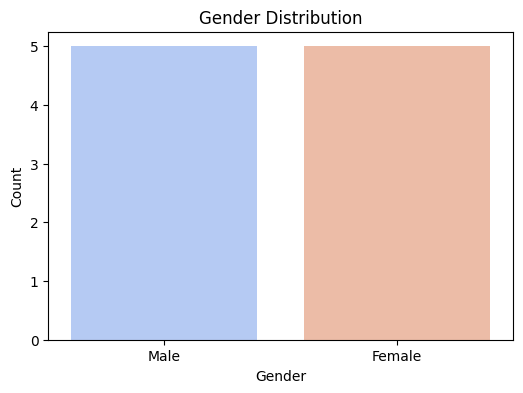

In [7]:
# Count the occurrences of each gender
gender_counts = data['Gender'].value_counts()
print(gender_counts)

# Create a bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='coolwarm')

# Labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")

plt.show()

Analyzing the Spending Score by Gender
 to Understand which gender tends to spend more.

In [8]:
# Calculate mean spending score by gender
spending_by_gender = data.groupby('Gender')['SpendingScore'].mean()

# Display the result
print(spending_by_gender)

Gender
Female    77.8
Male      54.6
Name: SpendingScore, dtype: float64


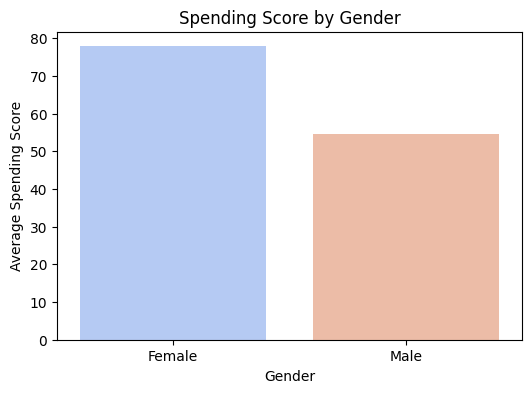

In [9]:
# Bar plot for spending score by gender
plt.figure(figsize=(6,4))
sns.barplot(x=spending_by_gender.index, y=spending_by_gender.values, palette='coolwarm')

# Labels and title
plt.xlabel("Gender")
plt.ylabel("Average Spending Score")
plt.title("Spending Score by Gender")

plt.show()

Exploration of Relationship Between Age and Spending Score
 Determine whether younger or older customers tend to spend more.

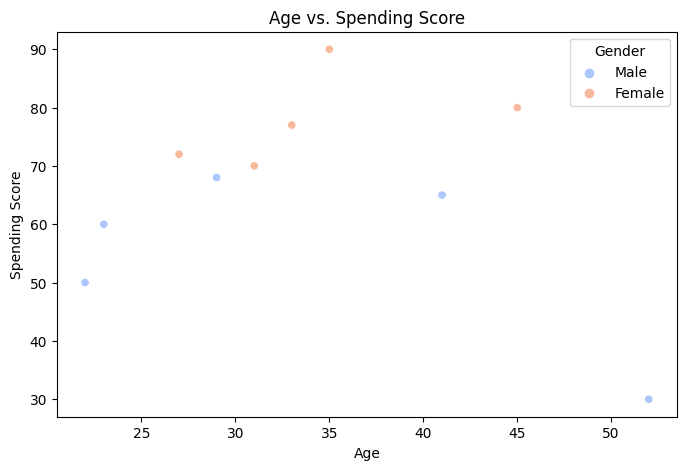

In [10]:
# Create scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['Age'], y=data['SpendingScore'], hue=data['Gender'], palette='coolwarm')

# Labels and title
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Age vs. Spending Score")

plt.show()

Category-Wise Spending Analysis
 To See which purchase category (Clothing, Electronics, Groceries) has the highest average spending.

In [11]:
category_spending = data.groupby('PurchaseCategory')['SpendingScore'].mean()
print(category_spending)

PurchaseCategory
Clothing       62.500000
Electronics    71.666667
Groceries      65.666667
Name: SpendingScore, dtype: float64


Comparing income vs spending

In [13]:
correlation = data['AnnualIncome'].corr(data['SpendingScore'])
print(f"Correlation between income and spending: {correlation}")

Correlation between income and spending: -0.13871200337250084


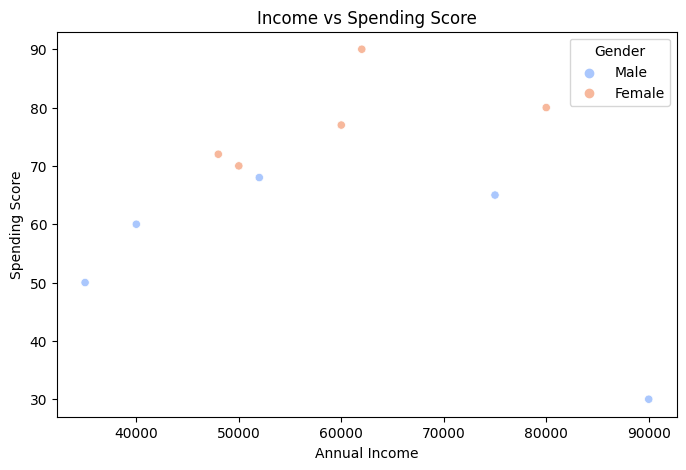

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['AnnualIncome'], y=data['SpendingScore'], hue=data['Gender'], palette='coolwarm')

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Income vs Spending Score")

plt.show()

In [15]:
# Grouping and Averages
income_bins = [30000, 50000, 70000, 90000]
data['IncomeGroup'] = pd.cut(data['AnnualIncome'], bins=income_bins)
avg_spending = data.groupby('IncomeGroup')['SpendingScore'].mean()
print(avg_spending)

IncomeGroup
(30000, 50000]    63.000000
(50000, 70000]    78.333333
(70000, 90000]    58.333333
Name: SpendingScore, dtype: float64


Create pie charts of category distributions.

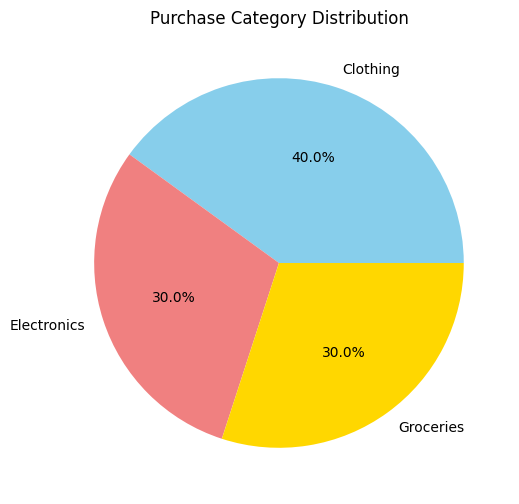

In [16]:
# Count the occurrences of each category
category_counts = data['PurchaseCategory'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'gold'])

# Title
plt.title("Purchase Category Distribution")

# Show the chart
plt.show()

# **Conclusion: Customer Spending Behavior Analysis**

### **Who are the high spenders?**
- Customers with a **higher Spending Score** tend to be **younger**.
- Female customers exhibit a higher **average spending score** compared to male customers.
- High-income customers do not necessarily spend the most; spending varies across income groups.

### **Are there patterns by gender or age?**
- **Age:** Younger individuals show a higher spending score, indicating they are more active consumers.
- **Gender:** Female customers tend to spend more on average than male customers.


### **What could a marketing team do based on this?**
- **Target younger shoppers** with personalized promotions and exclusive discounts to enhance engagement.
- **Create gender-based marketing strategies**, focusing on female shoppers who tend to have a higher spending score.
- **Optimize product categories** by analyzing popular spending trends (e.g., Clothing vs. Electronics vs. Groceries).
- **Introduce loyalty programs** to increase customer retention among high-spending individuals.

These insights enable businesses to refine their marketing approach and optimize revenue strategies based on customer preferences.
